In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Charger le dataset avec pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("../data/train.csv")


In [4]:
# Vérifier les dimensions (shape, colonnes)

df.shape
# df.columns



(200000, 202)

In [5]:
# Analyser la variable cible (target) - distribution des classes

df["target"].value_counts()

# 179 902 observations appartiennent à la classe 0
# 20 098 observations appartiennent à la classe 1
# Total ≈ 200 000 lignes

# La variable target est binaire :

# 0 = classe majoritaire (transaction normale / client non éligible)
# 1 = classe minoritaire (transaction positive / client éligible)


target
0    179902
1     20098
Name: count, dtype: int64

In [6]:
20098 / (179902 + 20098)

# ≈ 10 %
# Donc :
# ≈ 90 % de classe 0
# ≈ 10 % de classe 1
# Dataset fortement déséquilibré

0.10049

In [7]:
df.isnull().sum().sort_values(ascending=False).head()


ID_code    0
target     0
var_0      0
var_1      0
var_2      0
dtype: int64

In [8]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [9]:
df.describe().loc[["mean", "std", "min", "max"]]

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


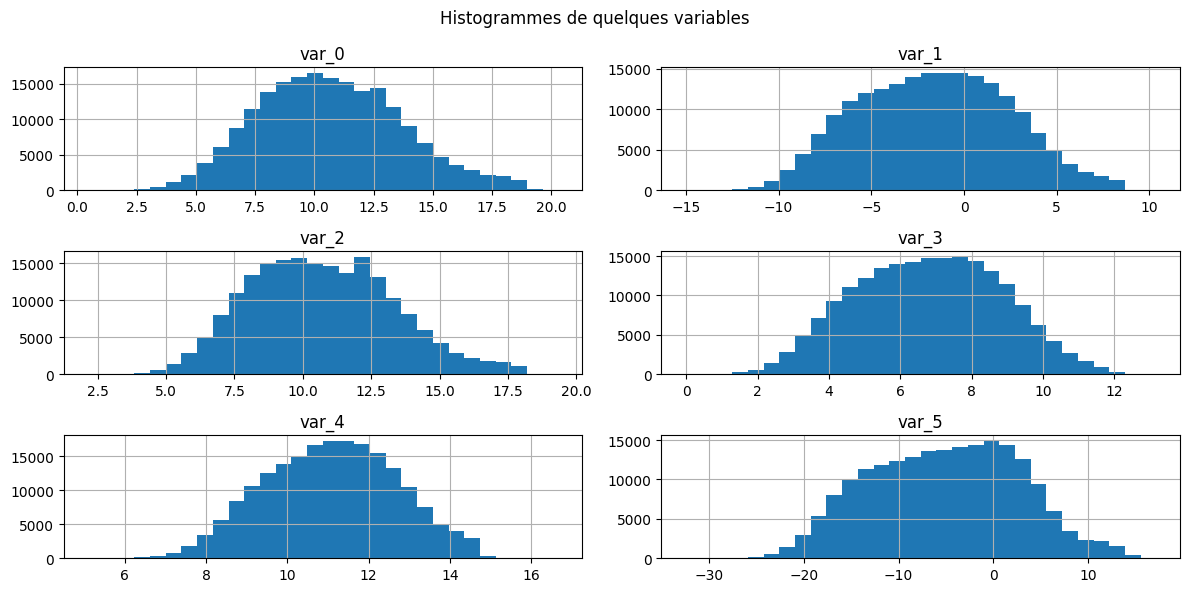

In [10]:
sample_features = [f"var_{i}" for i in range(6)]

df[sample_features].hist(figsize=(12, 6), bins=30)
plt.suptitle("Histogrammes de quelques variables")
plt.tight_layout()
plt.show()


<Figure size 1000x500 with 0 Axes>

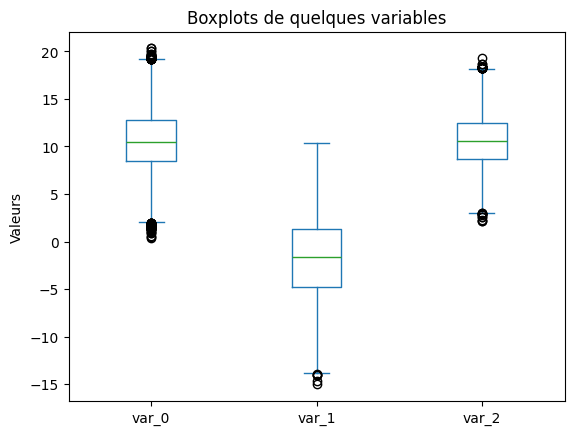

In [11]:
plt.figure(figsize=(10, 5))
df[["var_0", "var_1", "var_2"]].plot(kind="box")
plt.title("Boxplots de quelques variables")
plt.ylabel("Valeurs")
plt.show()


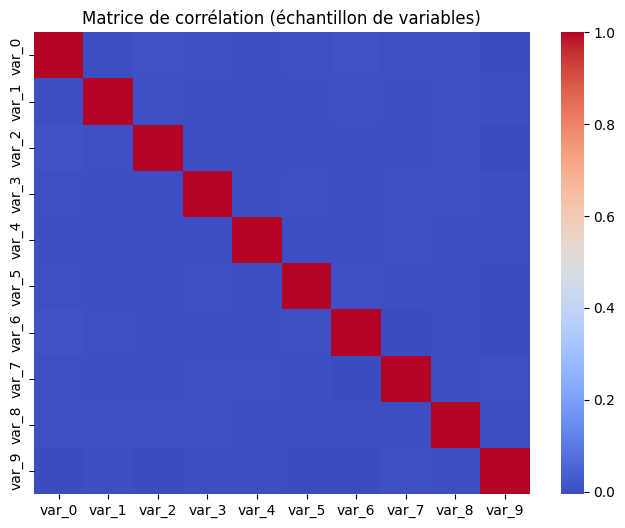

In [12]:
corr_features = [f"var_{i}" for i in range(10)]
corr_matrix = df[corr_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Matrice de corrélation (échantillon de variables)")
plt.show()


In [13]:
# Corrélation de chaque feature avec la cible
corr_target = df.drop(columns=["ID_code"]).corr()["target"]

# Top 10 variables les plus corrélées (en valeur absolue)
top_features = corr_target.abs().sort_values(ascending=False).head(10).index.tolist()

top_features


['target',
 'var_81',
 'var_139',
 'var_12',
 'var_6',
 'var_110',
 'var_146',
 'var_53',
 'var_26',
 'var_76']

In [14]:
top_features = [f for f in top_features if f != "target"]

In [15]:
# On enlève ID_code qui n'est pas une feature
corr_target = df.drop(columns=["ID_code"]).corr()["target"]

In [16]:
top_features = corr_target.abs().sort_values(ascending=False).head(15)
top_features

target     1.000000
var_81     0.080917
var_139    0.074080
var_12     0.069489
var_6      0.066731
var_110    0.064275
var_146    0.063644
var_53     0.063399
var_26     0.062422
var_76     0.061917
var_174    0.061669
var_22     0.060558
var_21     0.058483
var_99     0.058367
var_166    0.057773
Name: target, dtype: float64

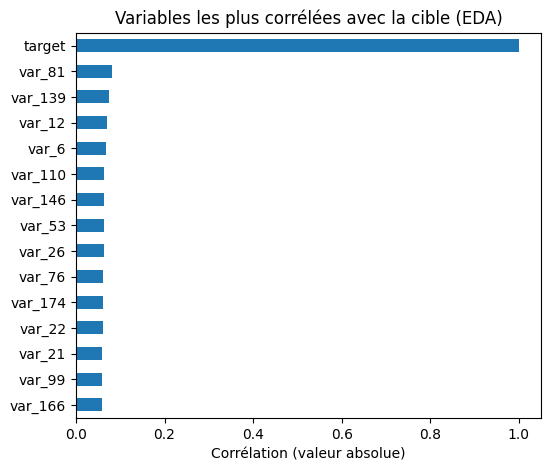

In [17]:
plt.figure(figsize=(6,5))
top_features.sort_values().plot(kind="barh")
plt.title("Variables les plus corrélées avec la cible (EDA)")
plt.xlabel("Corrélation (valeur absolue)")
plt.show()